# Load data

### retrieve data from Elastisearch

In [1]:
import retrieve_data

In [2]:
data = retrieve_data.run()

C:\Users\aless\Desktop\testEmbeddingModels\retrieve_data.py:34: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = dev_client.search(index=PROFILE_INDEX, query=query, scroll="30s", size=10000)['hits']['hits']


In [3]:
from utilis import get_bio_by_profile_id, rebuild_bio

In [4]:
get_bio_by_profile_id(data, 8)

'Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe Describe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines. Used for matchmaking purposesDescribe youself in a few lines

In [5]:
get_bio_by_profile_id(data, 12)

'I am a historian working in Lisbon. \n Currently I hold a post-doctoral fellowship in the H2020 project “COESO:Collaborative Engagements in Societal Issues” at the Centre for Research in Anthropology (University Institute of Lisbon);\nI am about to start an individual research project (2022-2028) “Out of Work: a critical history of unemployment in Portugal, 1890s-1970s”, at the Institute of Contemporary History (NOVA University of\nLisbon, Portugal). My research focuses on the fields of Social History, Southern European History after my PhD (2020). I co-funded and I am editor of\xa0Práticas da História. Journal on Theory, Historiography and Uses of the Past.'

# Semantic search

## variables

In [6]:
profile_id = 12
model = "labse"
top_k = 5

## semantic search

In [7]:
from semantic_sentence import semantic_search, m_sentences, semantic_text_similarity, best_rank_sentence

all_scores_semantic_search, result_semantic_search = semantic_search(data, profile_id, top_k=top_k, model=model)

In [8]:
# dict(sorted(result_semantic_search.items(), key=lambda item: item[1], reverse=True))

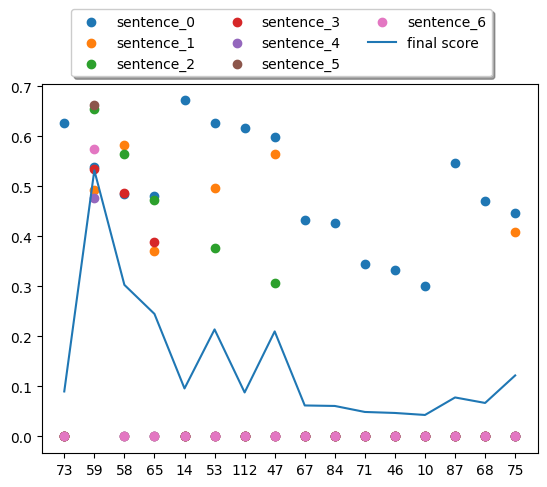

In [9]:
import matplotlib.pyplot as plt
import numpy as np

length = len(list(all_scores_semantic_search.values())[0])
profile_ids = [str(i) for i in all_scores_semantic_search.keys()]
sentences = [f"sentence_{i}" for i in range(length)]

fig = plt.figure()
for i in range(length):
    values = list()
    for element in all_scores_semantic_search.values():
        values.append(element[i])
    plt.scatter(profile_ids, values, marker='o', label=sentences[i])
    
plt.plot(profile_ids, result_semantic_search.values(), label='final score')  


fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## mean between vectors

In [10]:
result_mean = m_sentences(data, profile_id, type_operation='mean', model=model)

In [11]:
# for key, value in dict(sorted(result_mean.items(), key=lambda item: item[1], reverse=True)).items():
#     print(f"profile id: {key}\n")
#     print(f"score: {value}\n")
#     print("======================\n")

## median between vectors

In [12]:
result_median = m_sentences(data, profile_id, type_operation='median', model=model)

In [13]:
# for key, value in dict(sorted(result_median.items(), key=lambda item: item[1], reverse=True)).items():
#     print(f"profile id: {key}\n")
#     print(f"score: {value}\n")
#     print("======================\n")

## semantic search similarity

In [14]:
all_scores_semantic_text_similarity, result_semantic_text_similarity = semantic_text_similarity(data, profile_id, model=model)

In [15]:
# for key, value in dict(sorted(result_semantic_text_similarity.items(), key=lambda item: item[1], reverse=True)).items():
#     print(f"profile id: {key}\n")
#     print(f"score: {value}\n")
#     print("======================\n")

In [16]:
# for i in all_scores_semantic_text_similarity[53]:
#     for l in i:
#         print(round(l.item(), 4), end=" ")
#     print("\n")

In [17]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig = plt.figure()

# cax = plt.matshow(all_scores_semantic_text_similarity[16], fignum=0, aspect='auto', interpolation='nearest')
# fig.colorbar(cax)
# plt.show()

## best rank sentence

In [18]:
result_best_rank_sentence = best_rank_sentence(data, 12, min_score=0.5)

## all results

In [38]:
all_results = {
    "best_rank_sentence": dict(sorted(result_best_rank_sentence.items(), key=lambda item: item[1], reverse=True)),
    "result_mean": dict(sorted(result_mean.items(), key=lambda item: item[1], reverse=True)),
    "result_median": dict(sorted(result_median.items(), key=lambda item: item[1], reverse=True)),
    "result_semantic_text_similarity": dict(sorted(result_semantic_text_similarity.items(), key=lambda item: item[1], reverse=True)),
    "result_semantic_search": dict(sorted(result_semantic_search.items(), key=lambda item: item[1], reverse=True))
}

In [ ]:
for key, result in all_results.items():
for key, result in all_results.items():
    print()
    print("======================\n")
    